<a href="https://colab.research.google.com/github/nicolegold/AnalistaMachineLearning/blob/master/TrabalhoPratico3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris.info() , df_iris.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


(None, (150, 5))

In [ ]:
df_iris['target'].unique(), df_iris['target'].nunique()

(array([0., 1., 2.]), 3)

In [ ]:
#transforma os dados em array
# Dimensionalidade: 4 colunas
X = df_iris.iloc[:, :-1].values # dados de entrada - sleciona os valores de todas as linhas e todas as colunas menos a última
y = df_iris.iloc[:, -1].values # saídas ou target - seleciona os valores de todas as linhas e somente a coluna última coluna
X[:5], y[:5]

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2]]), array([0., 0., 0., 0., 0.]))

In [ ]:
# Tipo das features: Números reais positivos
# Realiza o processo de normalização dos dados
# normalização do banco de dados, necessário para que os algoritmos possam ter um comportamento mais "previsível"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1)) #cria o objeto que realiza a normalização dos dados por meio dos valores mínimos e máximos
scaler.fit(X)
 #aplicando a escala, normalizando valores na escala de 0 a 1
X_norm = scaler.fit_transform(X)
X_norm[:5]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667]])

In [ ]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state=42)# divide 33% para teste (50 amostras)
X_train[:5], y_train[:5], X_test[:5], y_test[:5], y_test.shape

(array([[0.38888889, 0.375     , 0.54237288, 0.5       ],
        [0.91666667, 0.41666667, 0.94915254, 0.83333333],
        [0.36111111, 0.41666667, 0.59322034, 0.58333333],
        [0.22222222, 0.625     , 0.06779661, 0.04166667],
        [0.94444444, 0.33333333, 0.96610169, 0.79166667]]),
 array([1., 2., 1., 0., 2.]),
 array([[0.5       , 0.33333333, 0.62711864, 0.45833333],
        [0.38888889, 0.75      , 0.11864407, 0.08333333],
        [0.94444444, 0.25      , 1.        , 0.91666667],
        [0.47222222, 0.375     , 0.59322034, 0.58333333],
        [0.69444444, 0.33333333, 0.6440678 , 0.54166667]]),
 array([1., 0., 2., 1., 1.]),
 (50,))

### Algoritmo KNN

In [ ]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier() # instancia modelo
knn.fit(X_train, y_train) # treina o modelo
knn.get_params () # devolve os parâmetros do modelo

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
#realiza a previsão
y_pred_knn = knn.predict(X_test)

#### Métricas do KNN

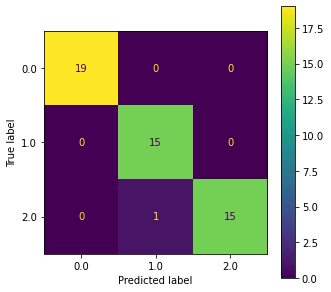

In [ ]:
#realiza o plot da matriz de confusão
from sklearn.metrics import plot_confusion_matrix

plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(knn, X_test, y_test)
plt.show()

In [ ]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Métricas do KNN
knn_acc = round(accuracy_score(y_test, y_pred_knn), 6)
knn_recall = round(recall_score(y_test, y_pred_knn, average='weighted'), 6)
knn_precision = round(precision_score(y_test, y_pred_knn, average='weighted'), 6)
knn_acc, knn_recall, knn_precision

(0.98, 0.98, 0.98125)

### Algoritmo Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() # instancia modelo
rfc.fit(X_train, y_train) # treina o modelo
rfc.get_params () # devolve os parâmetros do modelo

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#realiza a previsão
y_pred_rfc = rfc.predict(X_test)

#### Métricas do Random Forest

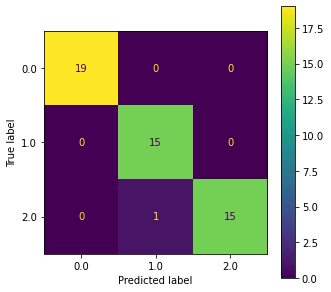

In [ ]:
#realiza o plot da matriz de confusão

plt.rcParams["figure.figsize"]=(5, 5)
plot_confusion_matrix(rfc, X_test, y_test)
plt.show()

In [ ]:
# Crie um relatório de texto mostrando as principais métricas de classificação.
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        19
         1.0       0.94      1.00      0.97        15
         2.0       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



In [ ]:
# Métricas do Random Forest
rfc_acc = round(accuracy_score(y_test, y_pred_rfc), 6)
rfc_recall = round(recall_score(y_test, y_pred_rfc, average='weighted'), 6)
rfc_precision = round(precision_score(y_test, y_pred_rfc, average='weighted'), 6)
rfc_acc, rfc_recall, rfc_precision

(0.98, 0.98, 0.98125)

### Comparando os modelos

In [ ]:
# Comparação
print('KNN vs Random Forest')
print(f'Classes: {iris.target_names}\n')
print(f'Acurácia: {knn_acc} vs {rfc_acc}')
print(f'Recall: {knn_recall} vs {rfc_recall}')
print(f'Precisão: {knn_precision} vs {rfc_precision}')

KNN vs Random Forest
Classes: ['setosa' 'versicolor' 'virginica']

Acurácia: 0.98 vs 0.98
Recall: 0.98 vs 0.98
Precisão: 0.98125 vs 0.98125


### Validação Cruzada

In [ ]:
# Validação cruzada
from sklearn.model_selection import cross_val_score
cv_knn = cross_val_score(knn, X, y)
cv_rfc = cross_val_score(rfc, X, y)
print(f'\nValidação cruzada: {cv_knn} vs {cv_rfc}')

# Calcula a média das validações cruzadas
print('\nCalcula a média das validações cruzadas')

sum_cv_knn = 0
for cv_score in cv_knn:
    sum_cv_knn += cv_score
print(f'\nResultado KNN: {sum_cv_knn/len(cv_knn)}')

sum_cv_rfc = 0
for cv_score in cv_rfc:
    sum_cv_rfc += cv_score
print(f'\nResultado Random Forest: {sum_cv_rfc/len(cv_rfc)}')


Validação cruzada: [0.96666667 1.         0.93333333 0.96666667 1.        ] vs [0.96666667 0.96666667 0.93333333 0.96666667 1.        ]

Calcula a média das validações cruzadas

Resultado KNN: 0.9733333333333334

Resultado Random Forest: 0.9666666666666668


### Buscando hiper parâmetros

In [ ]:
# Buscando hiper parâmetros
print('\nBuscando hiper parâmetros')

from sklearn.model_selection import GridSearchCV

# Random Forest Classifier
parametros = {'min_samples_split':(2,6), 'n_estimators': (5, 300)}
rfc_hps = GridSearchCV(rfc, parametros)
rfc_hps.fit(X,y)
print('Melhor valor para min_samples_split: {}'.format(rfc_hps.best_params_['min_samples_split']))
print('Melhor valor para n_estimators: {}'.format(rfc_hps.best_params_['n_estimators']))

# KNN
parametros = {'n_neighbors':(1,20)}
knn_hps = GridSearchCV(knn, parametros)
knn_hps.fit(X,y)
knn_hps.best_params_['n_neighbors']
print('Melhor valor para n_neighbors: {}'.format(knn_hps.best_params_['n_neighbors']))


Buscando hiper parâmetros
Melhor valor para min_samples_split: 6
Melhor valor para n_estimators: 300
Melhor valor para n_neighbors: 1
